# Fake news Detection

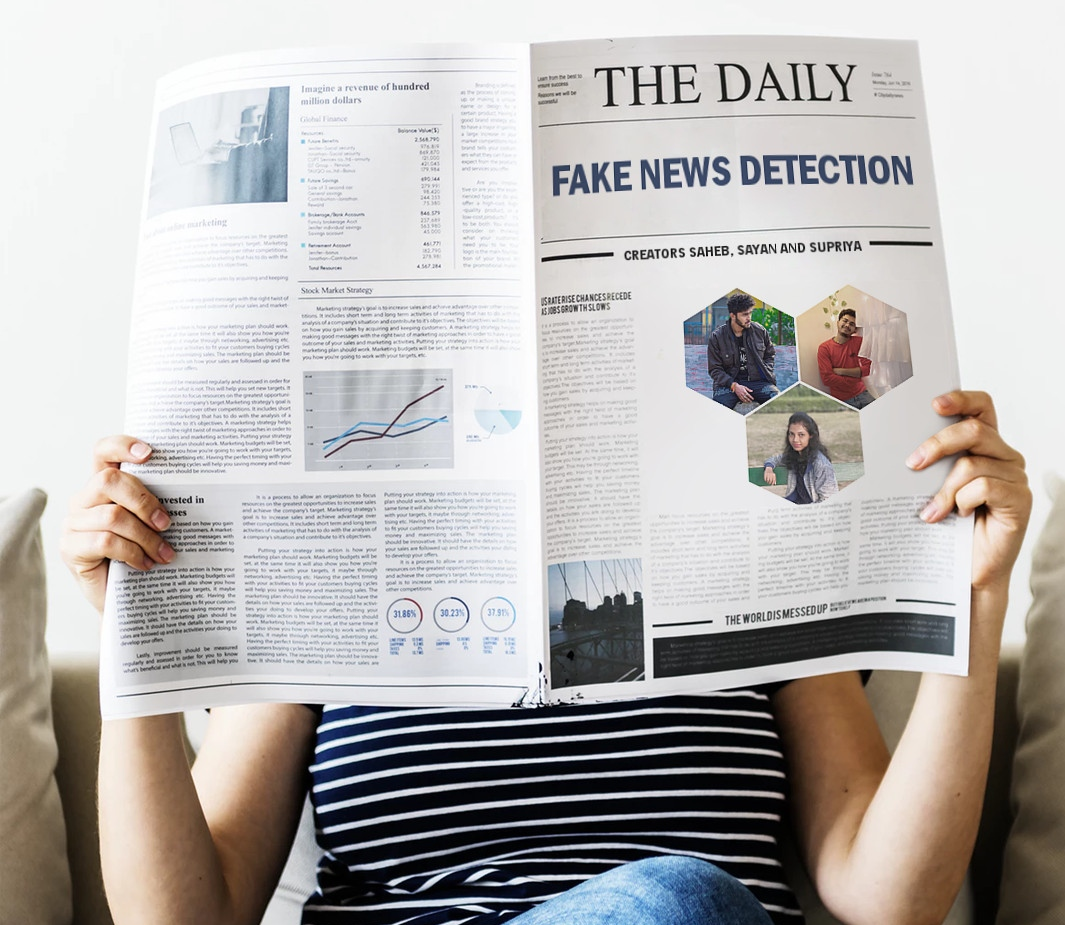

### Importing required library
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from joblib import load, dump

### Inserting fake and real dataset

In [ ]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [ ]:
df_fake.head(5)

In [ ]:
df_true.head(5)

Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [ ]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_fake.shape, df_true.shape

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [ ]:
df_fake_manual_testing.head(10)

In [ ]:
df_true_manual_testing.head(10)

In [ ]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

In [ ]:
df_marge.columns

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [ ]:
df.isnull().sum()

#### Randomly shuffling the dataframe 

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

In [ ]:
df.head()

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
dump(vectorization, filename="tfid.joblib")

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_lr))

In [ ]:
dump(LR, filename="LinearRegression.joblib")

### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_dt))

In [ ]:
dump(DT, filename="DecisionTreeClassifier.joblib")

### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_gbc))

In [ ]:
dump(GBC, filename="GradientBoostingClassifier.joblib")

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

In [ ]:
print(classification_report(y_test, pred_rfc))

In [ ]:
dump(GBC, filename="RandomForestClassifier.joblib")

# Model Testing With Manual Entry

### News

By just Running the below cells the application will work....

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from joblib import load


def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    vectorization = load(filename="tfid.joblib")
    new_xv_test = vectorization.transform(new_x_test)
    
    loaded_LR=load(filename="LinearRegression.joblib")
    loaded_DT=load(filename="LinearRegression.joblib")
    loaded_GBC=load(filename="LinearRegression.joblib")
    loaded_RFC=load(filename="LinearRegression.joblib")
    
    pred_LR = loaded_LR.predict(new_xv_test)
    pred_DT = loaded_DT.predict(new_xv_test)
    pred_GBC = loaded_GBC.predict(new_xv_test)
    pred_RFC = loaded_RFC.predict(new_xv_test)
    
    a=pred_LR[0]+pred_DT[0]+pred_GBC[0]+pred_RFC[0]
    a=a*25
    exp_val=[a,100-a]
    exp_labels=["Real","Fake"]
    
    print("\n\nThe Chances of the news being real according to the system is {b}%".format(b=a))
    plt.figure(figsize=(7,7))
    plt.pie(exp_val,labels=exp_labels)
    plt.legend(["Real", "Fake"])

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

On Monday, Russian Foreign Ministry Spokeswoman Maria Zakharova expressed confidence that NATO’s and the Western public’s silence on the situation in Donbass had resulted in a humanitarian and political disaster in Europe.  “NATO’s experiments and the deafening silence of the Western public – these are the reasons behind the humanitarian and political disaster in Europe. An end was to be put to this, since the West refused to conduct any negotiations whatsoever and welcomed aggressive statements and direct threats of Kiev puppets towards Russia,” the diplomat wrote on her Telegram channel, according to a report by RT.


The Chances of the news being real according to the system is 100%


LR Prediction: Real News 
DT Prediction: Real News 
GBC Prediction: Real News 
RFC Prediction: Real News


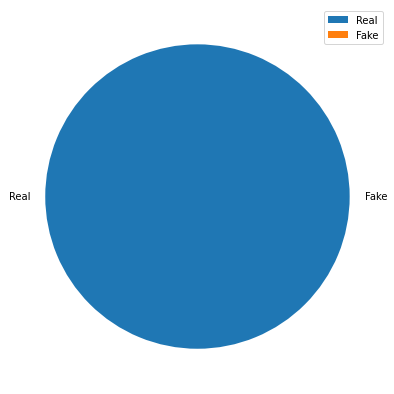

In [2]:
news = str(input())
manual_testing(news)